In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
what_we_are_covering=["An end to end scikit learn overflow",
"getting the data ready",
"choose the right estimator/algorithm for our problems",
"fit the model/ algorithm and use it to make prediction on our data",
"evaulating a model",
"improve a model",
"save and load a trained model",
"putting it all together" ]

# Introduction to Scikit learn (SKlearn)

this notebook demonstrate some of the most useful functions of the beautiful scikit learn library.

what are we going to cover


0. An end to end scikit learn overflow
1. getting the data ready
2. choose the right estimator/algorithm for our problems
3. fit the model/ algorithm and use it to make prediction on our data
4. evaulating a model
5. improve a model
6. save and load a trained model
7. putting it all together]

# 0. An end-to-end scikit learn Workflow

In [3]:
# get the data ready
heart_disease=pd.read_csv("6.1 heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# create x (feature matrix)
x=heart_disease.drop("target", axis=1)

# Create a y (labels)
y=heart_disease["target"]

In [5]:
#2.Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
#3. fit the model for training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3)

In [7]:
clf.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [8]:
#make a prediction 
y_preds=clf.predict(x_test)
y_preds

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0])

In [9]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2


In [10]:
y_test

14     1
165    0
258    0
293    0
129    1
      ..
176    0
213    0
189    0
130    1
269    0
Name: target, Length: 91, dtype: int64

In [11]:
#4.Evaluate the model
clf.score(x_train,y_train)

1.0

In [12]:
clf.score(x_test,y_test)


0.8021978021978022

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
classification_report(y_test,y_preds)

'              precision    recall  f1-score   support\n\n           0       0.94      0.67      0.79        49\n           1       0.71      0.95      0.82        42\n\n    accuracy                           0.80        91\n   macro avg       0.83      0.81      0.80        91\nweighted avg       0.84      0.80      0.80        91\n'

In [15]:
confusion_matrix(y_test,y_preds)

array([[33, 16],
       [ 2, 40]])

In [16]:
 accuracy_score(y_test,y_preds)

0.8021978021978022

In [17]:
# improve a model
#try different amount of n estimators
np.random.seed(45)
for i in range(10,100,10):
    print(f"trying model with{i} estimators....")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"model accuracy on test set:{clf.score(x_test,y_test)*100:2f}%")
    print("")

trying model with10 estimators....
model accuracy on test set:76.923077%

trying model with20 estimators....
model accuracy on test set:79.120879%

trying model with30 estimators....
model accuracy on test set:78.021978%

trying model with40 estimators....
model accuracy on test set:79.120879%

trying model with50 estimators....
model accuracy on test set:81.318681%

trying model with60 estimators....
model accuracy on test set:80.219780%

trying model with70 estimators....
model accuracy on test set:80.219780%

trying model with80 estimators....
model accuracy on test set:81.318681%

trying model with90 estimators....
model accuracy on test set:81.318681%



In [18]:
# save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model1.pkl", "wb"))

In [19]:
loaded_model=pickle.load(open("random_forest_model1.pkl", "rb"))
loaded_model.score(x_test,y_test)

0.8131868131868132

In [20]:
loaded_model

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",90
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [21]:
what_were_covering=[

"0.An end to end scikit learn overflow",
"1.getting the data ready",
"2.choose the right estimator/algorithm for our problems",
"3.fit the model/ algorithm and use it to make prediction on our data",
"4.evaulating a model",
"5.improve a model",
"6.save and load a trained model",
"7.putting it all together"]

In [22]:
what_were_covering

['0.An end to end scikit learn overflow',
 '1.getting the data ready',
 '2.choose the right estimator/algorithm for our problems',
 '3.fit the model/ algorithm and use it to make prediction on our data',
 '4.evaulating a model',
 '5.improve a model',
 '6.save and load a trained model',
 '7.putting it all together']

## 1. getting our ata ready to be used with machine learning

 three main thing we have to do:
 1. split the data into feature and labels
2. filling (also called imputing)or disregarding missing value
3. converting non numerical value into numerical value (also called feature encoding)

In [23]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [24]:
# step 1 
x=heart_disease.drop("target", axis=1)

In [25]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:
y=heart_disease["target"]

In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [28]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3)

In [29]:
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [30]:
x.shape

(303, 13)

# clean Data--->Transform Data--> Reduce Datam

# step2. make sure all are numerical 

In [31]:
# example
car_sales=pd.read_csv("7.1 car-sales.csv")

In [32]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [33]:
# 1. Remove the '$' and ',' symbols using string replacement
# regex=True allows us to replace multiple characters at once
car_sales["Price"] = car_sales["Price"].str.replace('[\\$\\,]', '', regex=True)

# 2. Convert to float first (because you likely have cents like .00)
car_sales["Price"] = car_sales["Price"].astype(float)

# 3. (Optional) If you really need integers, cast it now
car_sales["Price"] = car_sales["Price"].astype(int)

car_sales["Price"]

0     4000
1     5000
2     7000
3    22000
4     3500
5     4500
6     7500
7     7000
8     6250
9     9700
Name: Price, dtype: int64

In [34]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [35]:
# split into x and y
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

# split into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3)

In [36]:
x_test

,Make,Colour,Odometer (KM),Doors
4,Nissan,White,213095,4
0,Toyota,White,150043,4
3,BMW,Black,11179,5


In [37]:
y_test

4     3500
0     4000
3    22000
Name: Price, dtype: int64

# so as we see numerical data is required for a ml model

In [38]:
# turn the categories into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature=["Make", "Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                            
                                one_hot,
                                categorical_feature)],
                              remainder="passthrough")

transformed_x= transformer.fit_transform(x)
transformed_x


array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.50043e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 8.78990e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 3.25490e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.11790e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 2.13095e+05],
       [0.00000e+00, 0.00000e+

In [39]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,150043.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,87899.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32549.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11179.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,213095.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,99213.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45698.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,54738.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60000.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31600.0


In [40]:
## One more method to make it numerical by using pandas 

dummies=pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,False,False,True,False,False,False,False,True
1,4,False,True,False,False,False,False,False,True,False
2,3,False,False,False,True,False,True,False,False,False
3,5,True,False,False,False,True,False,False,False,False
4,4,False,False,True,False,False,False,False,False,True
5,4,False,False,False,True,False,False,True,False,False
6,4,False,True,False,False,False,True,False,False,False
7,4,False,True,False,False,False,True,False,False,False
8,4,False,False,False,True,False,False,False,False,True
9,4,False,False,True,False,False,False,False,False,True


In [41]:
# lets refit the model
from sklearn.ensemble import RandomForestRegressor
np.random.seed(43)
x_train, x_test, y_train, y_test= train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [42]:
model.score(x_test,y_test)

-2.3522329631832903

## what if there were missing value
1.Fill them with some value(also known as Imputation).

2. Remove the sample with missing data altogether.


In [43]:
#Import car sales missing data 
car_sales_missing= pd.read_csv("9.2 car-sales-missing-data.csv")

In [44]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [45]:
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [46]:




# let's try and convert it into number
# create x and y
x=car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"]

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature=["Make", "Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                            
                                one_hot,
                                categorical_feature)],
                              remainder="passthrough")

transformed_x= transformer.fit_transform(x)
transformed_x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 40 stored elements and shape (10, 16)>

In [48]:
x

,Make,Colour,Odometer,Doors
0,Toyota,White,150043.0,4.0
1,Honda,Red,87899.0,4.0
2,Toyota,Blue,NaN,3.0
3,BMW,Black,11179.0,5.0
4,Nissan,White,213095.0,4.0
5,Toyota,Green,NaN,4.0
6,Honda,NaN,NaN,4.0
7,Honda,Blue,NaN,4.0
8,Toyota,White,60000.0,NaN
9,NaN,White,31600.0,4.0


In [49]:
y

0     $4,000
1     $5,000
2     $7,000
3    $22,000
4     $3,500
5     $4,500
6     $7,500
7        NaN
8        NaN
9     $9,700
Name: Price, dtype: object

##option 1 : filling the data with [pandas 


In [50]:
# fill the make column
car_sales_missing["Make"].fillna("Missing",inplace=True)

# fill the colour column 
car_sales_missing["Colour"].fillna("Missing",inplace=True)
# fill the Odometer column
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(),inplace=True)

# fill the door column
car_sales_missing["Doors"]=car_sales_missing["Doors"].fillna("4")

C:\Users\rebik\AppData\Local\Temp\ipykernel_22048\720981484.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("Missing",inplace=True)
C:\Users\rebik\AppData\Local\Temp\ipykernel_22048\720981484.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [51]:
print(car_sales_missing.columns)


Index(['Make', 'Colour', 'Odometer', 'Doors', 'Price'], dtype='object')


In [52]:
car_sales_missing.isna().sum()


Make        0
Colour      0
Odometer    0
Doors       0
Price       2
dtype: int64

In [53]:
# drop the price 
car_sales_missing.dropna(inplace=True)

In [54]:
len(car_sales_missing)

8

In [55]:
x=car_sales_missing.drop("Price",axis=1)
Y=car_sales_missing["Price"]


In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature=["Make", "Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                            
                                one_hot,
                                categorical_feature)],
                              remainder="passthrough")

transformed_x= transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,
        0.0, 150043.0, '$4,000'],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,
        0.0, 87899.0, '$5,000'],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 92302.66666666667, '$7,000'],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        1.0, 11179.0, '$22,000'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,
        0.0, 213095.0, '$3,500'],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 92302.66666666667, '$4,500'],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 92302.66666666667, '$7,500'],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,
        0.0, 31600.0, '$9,700']], dtype=object)

In [57]:
(x_test, y_test)

(array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 1.1179e+04],
        [0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 3.1600e+04]]),
 3    22000
 9     9700
 Name: Price, dtype: int64)

In [58]:
(x_train, y_train)

(array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         1.00000e+00, 0.00000e+00, 4.56980e+04],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
         1.00000e+00, 0.00000e+00, 6.00000e+04],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
         1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
         0.00000e+00, 0.00000e+00, 3.25490e+04],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
         0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         1.00000e+00, 0.00000e+00, 9.92130e+04],
        [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
         1.00000e+00, 0.00000e+00, 8.78990e+04],
        [0.0000

# Method 2 : Using scikit learn 

In [59]:
car_sales_missing=pd.read_csv("scikit learn/9.1 scikit-learn-data/car-sales-extended-missing-data.csv")

In [60]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [61]:
len(car_sales_missing)

1000

In [62]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [63]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [64]:
# split into x and y
x=car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"]

In [65]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(x)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], shape=(950, 4), dtype=object)

In [66]:
car_sales_filled=pd.DataFrame(filled_X,
                              columns=["Make", "Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [67]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature=["Make", "Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                            
                                one_hot,
                                categorical_feature)],
                              remainder="passthrough")

transformed_x= transformer.fit_transform(car_sales_filled)
transformed_x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [69]:
 # 1. Import the model
from sklearn.ensemble import RandomForestRegressor

# (Ensure these are imported as well, based on your snippet)
from sklearn.model_selection import train_test_split
import numpy as np

# 2. Your existing code
np.random.seed(43)

x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                    y,
                                                    test_size=0.2)

# Now this line will work
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.1291363627729899

In [70]:
len(car_sales_filled), len(car_sales)


(950, 10)

## Choose the right estimator/algorithm for our problems
#scikit-learn uses estimators as another term  for machine learning model or algorithm
1. classification-  predicting whether a sample is one thing or another
2. Regression- predicting a number 


In [71]:
# import boston housing dataset
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\rebik\AppData\Local\Temp\ipykernel_22048\3537617136.py:6: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [72]:
# 1. Manually list the column names (since the raw file didn't come with them)
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# 2. Create the DataFrame using your 'data' variable directly
# DO NOT use housing["data"]
housing_df = pd.DataFrame(data, columns=feature_names)

# 3. Add the target column
housing_df["target"] = target

# 4. View the result
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [73]:
housing_df["target"]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [74]:
housing_df["target"].head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [75]:
# Lets try the ridge regression model

## importing ridge from scikit learn library
from sklearn.linear_model import Ridge
# Now start the seeding
np.random.seed(43)

# Now import the data
x=housing_df.drop("target", axis=1)
y=housing_df["target"]
# now fitting the model
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

# instaniate the ridge model
model=Ridge()
model.fit(x_train, y_train)
# check the score
model.score(x_test,y_test)



0.7626309745592266

In [76]:
len(housing_df)


506

how do we improve this score.

what if ridge wasn't working. 

let's refer back to the map...https://scikit-learn.org/stable/machine_learning_map.html


In [77]:
# 2.2 Lets try with RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

# give the data to x and y\
x=housing_df.drop("target", axis=1)
y=housing_df["target"]
# testing the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# initinate the model
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
# now for the score 
rf.score(x_test,y_test)

0.9226017459290787

In [78]:
model.score(x_test,y_test)

0.7558194421459348

## 2.2 Choosing an estimator for Classification 

. lets refer back to map....https://scikit-learn.org/stable/machine_learning_map.html

In [79]:
model.score(x_test,y_test)

0.7558194421459348

In [80]:
heart_disease=pd.read_csv("6.1 heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# using the map we have to use svm model

In [81]:
from sklearn import svm

# choosing the data x and y 
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# split the model
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)
# now using the svm model
clf=svm.SVC()
clf.fit(x_train,y_train)
# now checking the score using svm model
clf.score(x_test,y_test)

0.5901639344262295

In [82]:
len(heart_disease)

303

In [83]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [84]:
# now using the Random tree
from sklearn.ensemble import RandomForestClassifier

# choosing the data x and y 
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# split the model
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)
# now using the RandomForestClassifier model
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
# now checking the score using RandomForestClassifier model
clf.score(x_test,y_test)

0.8360655737704918

In [85]:
# now using the Random tree
from sklearn.ensemble import RandomForestClassifier

# choosing the data x and y 
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# split the model
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)
# now using the RandomForestClassifier model
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
# now checking the score using RandomForestClassifier model
clf.score(x_test,y_test)

0.7868852459016393

tidbit:

1. if you have structured dATA use ensemble method
2. if you have unstructured data use deep learning and transfer learning

In [86]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Fit the model/Algorithm on our data and use it for making prediction 

### 3.1 Fitting the model to the data

* 'X'= features, features_variables, Data
* 'Y'= labels, targets, target Variables

In [87]:
# now using the Random tree
from sklearn.ensemble import RandomForestClassifier

# choosing the data x and y 
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# split the model
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)
# now using the RandomForestClassifier model
clf=RandomForestClassifier(n_estimators=100)
# fitting the model (training the machine learning model)
clf.fit(x_train,y_train)
# now checking the score using RandomForestClassifier model( making the prediction using machine learning model)
clf.score(x_test,y_test)

0.8524590163934426

In [88]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [89]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [90]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

## 3.2 making the prediction using the machine learning model 

two ways for making prediction (functions).

1.'predict()'
2.'predict_proba()'

In [91]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [92]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [93]:
# using predict function
clf.predict(x_test)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [94]:
np.array([y_test])

array([[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0]])

In [95]:
clf.score(x_test,y_test)

0.8524590163934426

In [96]:
y_preds=clf.predict(x_test)
np.mean(y_test==y_preds)

np.float64(0.8524590163934426)

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [98]:
a=np.array([1,2,34,5,6])

clf.predict(a)# this does not work

## Using predict_proba function


In [99]:
## predict_proba () return probabilities of classification label
clf.predict_proba(x_test[:6])

array([[0.73, 0.27],
       [0.84, 0.16],
       [0.37, 0.63],
       [0.89, 0.11],
       [0.78, 0.22],
       [0.14, 0.86]])

In [100]:
clf.predict(x_test[:6])

array([0, 0, 1, 0, 0, 1])

In [101]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2


## making prediction for regression
'predict' can also used for regression

In [102]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(43)
# splitting the data 
x=housing_df.drop("target", axis=1)
y=housing_df["target"]
# training the model
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

# using the RandomForestRegressor model
model=RandomForestRegressor().fit(x_train,y_train)

# predicting the model 
y_preds=model.predict(x_test)


In [103]:
y_preds

array([23.165, 15.473, 20.689, 30.632, 18.57 , 17.911, 18.991, 24.133,
       20.931, 17.756, 21.709, 26.333, 18.081, 21.266, 19.742,  9.001,
       26.035, 31.813, 12.814, 46.643, 20.35 ,  9.231, 19.688, 34.077,
        8.527, 28.565, 15.291, 19.561, 20.608, 14.154, 20.438, 19.928,
       15.111, 11.305, 19.92 , 19.347, 15.929, 20.666, 26.669, 24.785,
       20.118,  9.804, 22.108, 21.514, 45.399, 19.013, 21.711, 19.454,
       44.765, 14.515, 26.956, 45.632, 45.255, 21.038, 14.602, 48.848,
       41.444, 23.463, 27.717, 26.134, 19.742, 15.571, 22.303, 23.341,
       29.536, 14.173, 21.266, 34.155,  9.718, 22.133, 16.305,  9.499,
        7.808, 12.513, 12.567, 23.142, 20.635, 23.459, 25.208, 20.809,
       11.467, 20.047, 15.058,  9.619, 18.727, 25.874, 10.885, 33.187,
       11.422, 13.905, 15.45 , 20.695, 21.512, 22.418, 20.523, 18.756,
       30.674, 33.046, 32.135, 44.436, 16.294, 20.72 ])

In [104]:
y_test

360    25.0
391    23.2
247    20.5
57     31.6
244    17.6
       ... 
482    25.0
64     33.0
98     43.8
127    16.2
59     19.6
Name: target, Length: 102, dtype: float64

In [105]:
np.array([y_test])

array([[25. , 23.2, 20.5, 31.6, 17.6, 19.7, 18.5, 22.2, 22.7, 23.7, 22.8,
        24.8, 17.5, 21.7, 21.4,  5.6, 29. , 37.2, 14.9, 50. , 22. ,  7.2,
        19. , 35.4, 10.4, 29.8, 16.7, 19.2, 19.9, 14.6, 21.1, 19.2, 10.9,
         6.3, 24.3, 18.6, 17.2, 20.9, 23.3, 25.2, 21.5, 10.2, 25. , 14.1,
        37.6, 18.7, 23.1, 17.4, 35.2, 15.4, 24.5, 48.3, 39.8, 24.7, 13.6,
        50. , 50. , 24.8, 28.6, 22. , 21.4, 14.8, 21.6, 22.3, 30.1, 13.4,
        24.4, 33.3,  8.7, 21.4, 15.7,  8.4,  8.5, 13.8,  7. , 22. , 24. ,
        20.1, 17.8, 10.4, 12.8, 19.3, 14. ,  7.2, 22.5, 30.1, 11.5, 36. ,
        13.4, 15.6, 17.8, 24.5, 22. , 23. , 18.9, 16.8, 41.3, 25. , 33. ,
        43.8, 16.2, 19.6]])

In [106]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)


2.3850882352941185

In [107]:
what_we_are_covering

['An end to end scikit learn overflow',
 'getting the data ready',
 'choose the right estimator/algorithm for our problems',
 'fit the model/ algorithm and use it to make prediction on our data',
 'evaulating a model',
 'improve a model',
 'save and load a trained model',
 'putting it all together']

## 4. Evaulating a model

.three ways for score method

1.usual 'score' Method.

2.using score parameters.

3.problem specific metric. 

## Using the usual 'score' Method

In [108]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(43)

x=housing_df.drop("target", axis=1)
y=housing_df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)



0.8771424782582735

In [109]:
# for classification
# now using the Random tree
from sklearn.ensemble import RandomForestClassifier

# choosing the data x and y 
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# split the model
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)
# now using the RandomForestClassifier model
clf=RandomForestClassifier(n_estimators=100)
# fitting the model (training the machine learning model)
clf.fit(x_train,y_train)
# now checking the score using RandomForestClassifier model( making the prediction using machine learning model)
clf.score(x_test,y_test)


0.8852459016393442

## 2. Evaulating the Model using the Scoring Parameters

In [110]:
from sklearn.model_selection import cross_val_score
# for classification
# now using the Random tree
from sklearn.ensemble import RandomForestClassifier

# choosing the data x and y 
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# split the model
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)
# now using the RandomForestClassifier model
clf=RandomForestClassifier(n_estimators=100)
# fitting the model (training the machine learning model)
clf.fit(x_train,y_train)
# now checking the score using RandomForestClassifier model( making the prediction using machine learning model)
clf.score(x_test,y_test)



0.8360655737704918

In [111]:
# using Cross_val_score 
cross_val_score(clf, x,y,cv=5)

array([0.81967213, 0.86885246, 0.78688525, 0.78333333, 0.8       ])

In [112]:
cross_val_score(clf,x,y,cv=10)

array([0.87096774, 0.80645161, 0.83870968, 0.9       , 0.86666667,
       0.8       , 0.8       , 0.83333333, 0.73333333, 0.83333333])

In [113]:
np.random.seed(42)

# using score method
single_score=clf.score(x_test,y_test)
#using the cross val score
cross_score=np.mean(cross_val_score(clf,x,y,cv=5))
# now comparing these two
single_score,cross_score

(0.8360655737704918, np.float64(0.8248087431693989))

In [114]:
# the scoring paramater is set to be at default of NONE
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

# the default score in the classifier shows mean accuracy 
clf.score()# click shift+tab to get the value

In [115]:
single_score


0.8360655737704918

In [116]:
cross_score# as we can see the cross_score has less accuracy but we use the cross score because it provides a true accuracy stat

np.float64(0.8248087431693989)

## 4.2.1 Classification model evaulation metrics

1.Accuracy. 

2.Area under roc curve.

3.confusion matrix.

4.Classification Reports

In [117]:
# accuracy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

clf=RandomForestClassifier(n_estimators=100).fit(x_train,y_train)
cross_val_score=cross_val_score(clf,x,y,cv=5,scoring=None)



In [118]:
cross_val_score

array([0.81967213, 0.90163934, 0.80327869, 0.83333333, 0.76666667])

In [119]:
np.mean(cross_val_score)

np.float64(0.8249180327868852)

In [120]:
print(f"the accuracy of the heart disease by using cross validated estimators is:{np.mean(cross_val_score)*100:.2f}%")

the accuracy of the heart disease by using cross validated estimators is:82.49%


** Area Under Roc curve(receiver operating curve(AUC|ROC))**

*Area under curve (AUC).

*ROC Curve.

roc curve are the comprasion of model's true positive rate (tpr) versus a model false positivr rate(fpr).

* true positive = model predicts 1 when truth is 1.
* false positive = model predicts 1 when truth is 0
* true negative = model predicts 0 when truth is 0
  
*true negative = model predicts 1 when truth is 0

In [121]:
#Create x_test...etc
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [122]:
from sklearn.metrics import roc_curve
# fit the classifier 
clf.fit(x_train, y_train)
# make prediction with probabilities
y_probs=clf.predict_proba(x_test)

y_probs[:10], len(y_probs)


(array([[0.25, 0.75],
        [0.84, 0.16],
        [0.43, 0.57],
        [0.3 , 0.7 ],
        [0.14, 0.86],
        [0.87, 0.13],
        [0.29, 0.71],
        [0.02, 0.98],
        [0.  , 1.  ],
        [0.07, 0.93]]),
 61)

In [123]:
y_probs_positive=y_probs[:,1]
y_probs_positive

array([0.75, 0.16, 0.57, 0.7 , 0.86, 0.13, 0.71, 0.98, 1.  , 0.93, 0.27,
       0.93, 0.53, 0.21, 0.63, 0.75, 0.53, 0.25, 0.95, 0.05, 0.35, 0.6 ,
       0.52, 0.01, 0.13, 0.67, 0.51, 0.91, 1.  , 0.66, 0.22, 0.36, 0.67,
       0.52, 0.98, 0.48, 0.36, 0.67, 0.99, 1.  , 0.33, 0.72, 0.77, 0.42,
       0.68, 0.61, 0.09, 0.98, 0.08, 0.88, 0.84, 0.04, 0.6 , 0.73, 0.62,
       0.36, 0.08, 0.35, 0.76, 0.86, 0.73])

In [124]:
# calculate fpr,tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)
# check the false positive rate
fpr
# check the false positive rate

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04166667,
       0.04166667, 0.08333333, 0.08333333, 0.125     , 0.16666667,
       0.16666667, 0.20833333, 0.20833333, 0.20833333, 0.25      ,
       0.25      , 0.29166667, 0.41666667, 0.45833333, 0.58333333,
       0.58333333, 0.66666667, 0.75      , 0.79166667, 0.875     ,
       1.        ])

In [125]:
# check the True positive rate
tpr

array([0.        , 0.08108108, 0.10810811, 0.18918919, 0.21621622,
       0.27027027, 0.32432432, 0.37837838, 0.43243243, 0.43243243,
       0.54054054, 0.54054054, 0.62162162, 0.67567568, 0.67567568,
       0.75675676, 0.78378378, 0.81081081, 0.86486486, 0.89189189,
       0.94594595, 0.94594595, 0.94594595, 0.97297297, 0.97297297,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [126]:

# check the Thresholds
thresholds

array([ inf, 1.  , 0.99, 0.98, 0.95, 0.93, 0.88, 0.86, 0.77, 0.76, 0.73,
       0.72, 0.68, 0.67, 0.66, 0.61, 0.6 , 0.57, 0.53, 0.52, 0.48, 0.42,
       0.36, 0.35, 0.25, 0.22, 0.16, 0.13, 0.09, 0.08, 0.01])

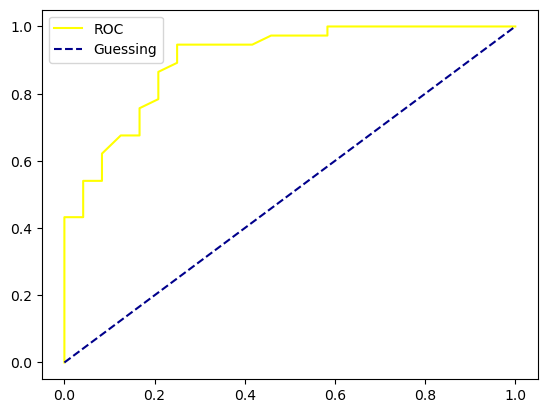

In [127]:
# create a function for plotting roc curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    
    """
    plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr)of a model
    """
# plot ROC Curve 
    plt.plot(fpr, tpr, color="yellow", label="ROC")
## plot line with no predictive power (Baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")

    #Customize the plot 
    plt.xlabel=("False Positive Rate")
    plt.ylabel=("True Positive Rate")
    plt.title=("REceiver Operating Charecterstics (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)    
    

In [128]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9003378378378378

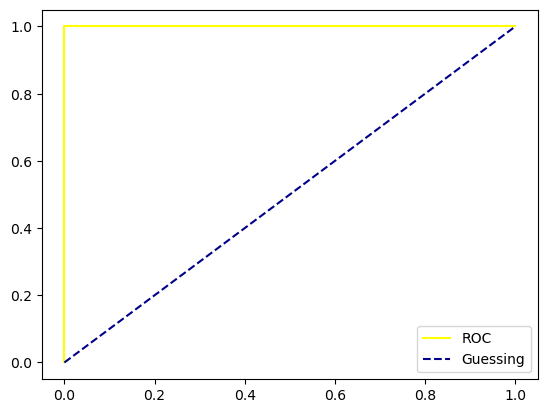

In [129]:
# plot perfect ROC curve and AUC score
fpr,tpr,thresholds=roc_curve(y_test, y_test)# for 100% Accuracy
plot_roc_curve(fpr,tpr)

In [130]:
# for 100% Accuracy\
roc_auc_score(y_test,y_test)

1.0


## Confusion Matrix


** Confusion Matrix **
A confusion matrix is a quick way to compare the labels a model predict and the actual label it was supposed to predict

In essence giving you an idea of where the model is getting confused 

In [131]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)

confusion_matrix(y_test,y_preds)

array([[18,  6],
       [ 3, 34]])

In [132]:
# Visualising using pandas 
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Label"],
            colnames=["Predicted label"])

Predicted label,0,1
Actual Label,,
0,18,6
1,3,34


In [133]:
## how to install a module in jupyter notebook
import sys

!conda install --yes --prefix {sys.prefix} seaborn



Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.



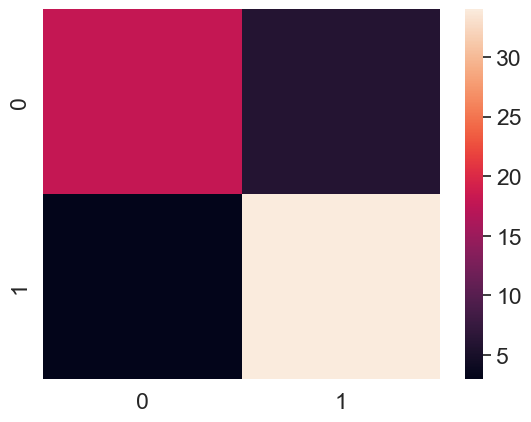

In [134]:
# make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns 

# set the font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat=confusion_matrix(y_test, y_preds)

# plot it using seaborn 
sns.heatmap(conf_mat);

TypeError: 'str' object is not callable

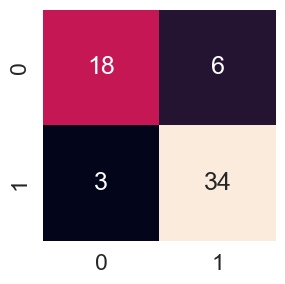

In [135]:
## plot it in graph
def plot_conf_mat(conf_mat):
    """
    plots a confusion matrix using seaborn's heatmap();
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,
                   annot=True,
                   cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted Label")
                        
plot_conf_mat(conf_mat)

In [137]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,x,y)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\rebik\sample_project_1\env\Lib\site-packages\sklearn\metrics\__init__.py)

**Classification Reports**


In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.85      0.92      0.88        37

    accuracy                           0.85        61
   macro avg       0.85      0.83      0.84        61
weighted avg       0.85      0.85      0.85        61



In [139]:
## when should i use all these classification models 
# this is where prediction and recall becomes valuable 
disease_true=np.zeros(10000)
disease_true[0]=1# only one positive case 
disease_preds= np.zeros(10000)# model predicts every case as 0
pd.DataFrame(classification_report(disease_true,
                                   
                                   disease_preds,
                                   
                                   output_dict=True))




C:\Users\rebik\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\rebik\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\rebik\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [140]:
what_we_are_covering


['An end to end scikit learn overflow',
 'getting the data ready',
 'choose the right estimator/algorithm for our problems',
 'fit the model/ algorithm and use it to make prediction on our data',
 'evaulating a model',
 'improve a model',
 'save and load a trained model',
 'putting it all together']

In [141]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


#Classification reports 

. accuracy is a good measure to start with if all classes are balanced(e.g. same amount of sample which are labelled with 0 and 1 )

. Precision and recall becames more important when classes are imbalanced 

. if false negative predictions are worse than false negative , aim for higher precision.

. if false positive predictions are worse than false positives , aim for higher
recall.

. F1-score is a combination of precision and recall 

### 4.2.2 Regression model Evaulation metrics 

model evaulation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1.R^2(pronounced r-squared or coefficient of determination).

2. Mean absolute error(MAE).
   
3. mean squared error(MSE).

4. **R^2**

5. what r-squared does: compare your model prediction to the mean of the target values can range from negative infinity (a very poor model) to 1 .for example , if all your model does is predict the mean of the targets , it is R^2 value should be 0.
and if your model perfectly predicts a range of number its R^2 value would be 1.


In [142]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=housing_df.drop("target", axis=1)
y=housing_df["target"]

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [143]:
model.score(x_test,y_test)

0.8654448653350507

In [144]:
from sklearn.metrics import r2_score 

# fill an array with y_test mean 
y_test_mean=np.full(len(y_test), y_test.mean())

In [145]:
y_test.mean()

np.float64(21.488235294117644)

In [146]:
r2_score(y_test, y_test_mean)

0.0

In [147]:
r2_score(y_test,y_test)

1.0

** Mean Absolute Error**

MAE is the average of the absolute differences between predictions and actual value it gives you an idea of how wrong your model predictions are 

In [148]:
# Mean absolute error 
from sklearn.metrics import mean_absolute_error

y_preds= model.predict(x_test)
mae=mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [149]:
df=pd.DataFrame(data={"actual values": y_test,
                      "predicted values": y_preds})
df["differences"]=df["predicted values"]-df["actual values"]
df["differences"]

173   -0.519
274   -1.826
491    3.159
72     0.660
452    0.793
       ...  
412   -4.741
436    2.876
411   -3.588
86    -2.295
75     2.432
Name: differences, Length: 102, dtype: float64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 173 to 75
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   actual values     102 non-null    float64
 1   predicted values  102 non-null    float64
 2   differences       102 non-null    float64
dtypes: float64(3)
memory usage: 3.2 KB


## MEan Squared Error**

In [154]:
# mean squared error 
from sklearn.metrics import mean_squared_error

y_preds=model.predict(x_test)
mse=mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [155]:
squared=np.square(df["differences"])
squared.mean()

np.float64(9.867437068627442)

In [156]:
what_we_are_covering

['An end to end scikit learn overflow',
 'getting the data ready',
 'choose the right estimator/algorithm for our problems',
 'fit the model/ algorithm and use it to make prediction on our data',
 'evaulating a model',
 'improve a model',
 'save and load a trained model',
 'putting it all together']

## 4.2.3 Finally using the 'scoring' parameter 

In [158]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)


0.8524590163934426

In [161]:
np.random.seed(42)
cv_acc=cross_val_score(clf,x,y,cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [162]:
# Cross validated accuracy
print(f'the cross validated accuracy is:{np.mean(cv_acc)*100:.2f}%')

the cross validated accuracy is:82.48%


In [166]:
np.random.seed(42)
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc.mean()

np.float64(0.8248087431693989)

In [165]:
print(f'the cross validated accuracy is:{np.mean(cv_acc)*100:.2f}%')

the cross validated accuracy is:82.48%


In [167]:
np.random.seed(42)
cv_precision=cross_val_score(clf,x,y,cv=5, scoring="precision")

In [168]:
cv_precision.mean()

np.float64(0.8329547346025924)

In [169]:
print(f'the cross validated accuracy is:{np.mean(cv_precision)*100:.2f}%')

the cross validated accuracy is:83.30%


In [170]:
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.81818182, 0.87878788])

In [171]:
print(f'the cross validated accuracy is:{np.mean(cv_recall)*100:.2f}%')

the cross validated accuracy is:84.24%


#  How about our regression model

In [179]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
x=housing_df.drop("target" ,axis=1)
y=housing_df["target"]



model=RandomForestRegressor(n_estimators=100)


In [180]:
np.random.seed(42)
cv_r2=cross_val_score(model,x,y,cv=5,scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [181]:
print(f'the cross validated accuracy is:{np.mean(cv_r2)*100:.2f}%')

the cross validated accuracy is:62.44%


In [184]:
#MAE
cv_mae=cross_val_score(model,x,y,cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [185]:
print(f'the cross validated accuracy is:{np.mean(cv_mae)*100:.2f}%')

the cross validated accuracy is:-300.32%


In [186]:
#MSE
cv_mse=cross_val_score(model,x,y,cv=5,scoring="neg_mean_squared_error")
cv_mse
                       

array([ -7.8141513 , -12.94343325, -19.11614042, -46.28783248,
       -19.48161818])

In [187]:
print(f'the cross validated accuracy is:{np.mean(cv_mse)*100:.2f}%')

the cross validated accuracy is:-2112.86%


## 5. Improving a model

First Predictions=baseline predictions
first model=baseline model

from data prespective:
* could we collect more data?(generally more data is better)
* could we i mprove our data

From a model prespective :
* Is there a better model we can use
* could we improve the current model

Hyperparameters vs parameters 
* Parameters=model find these patterns in  data
* Hyperparameters=settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways tom adjust parameters
* by hand
* Random with RandomSearchCV
* Exhaustively with gridsearchCV


In [188]:
from sklearn.ensemble import RandomForestClassifier 

clf=RandomForestClassifier(n_estimators=100)

In [189]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

hyperparameters means you practice untill you get your required model


In [ ]:
# By hand 
